# Statistical and Machine Learning (01.113) - HW5 Question 3

In this problem, we will study the multi-armed $(k = 10)$ bandit problem.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

T = 1000;

### $\epsilon$-greedy policy

Behave greedily most of the time, but explore once in a while:

$$
A_{t}=\left\{\begin{array}{l}{i^{*}=\arg \max _{i} Q_{t}(i) \quad \text { with probability } 1-\epsilon} \\ {j, j \neq i^{*} \quad \text { each with probability } \frac{\epsilon}{k-1}}\end{array}\right.
$$

Balances exploitation vs exploration, but does not select intelligently
between the $k − 1$ non-greedy actions.

In [2]:
# greed and UCB function
def e_greedy(Q,N,t,e):
    """
    Q: 1-d array of action-values
    N: 1-d array of action counts (X)
    t: time (total number of actions taken thus far) (X)
    e: exploration probability
    
    Returns
        next action to be made
    """
    current_action = np.argmax(Q)
    if np.random.rand()<e: # explore other action with equal probability
        other_actions = [i for i in range(len(Q)) if i != current_action]
        next_action = np.random.choice(other_actions)
    else:
        next_action = current_action 
    return next_action

### Upper confidence bound (UCB)

Select action at time $t$ according to
$$
A_{t}=\underset{i}{\arg \max }\left(Q_{t}(i)+c \sqrt{\frac{\log t}{N_{t}(i)}}\right)
$$
where $N_t(i)$ denotes the number of times action $i$ has been selected prior to time $t$, and $c$ is the exploration constant; increasing it favours exploration and decreasing it favours exploitation.

In [3]:
# the denominator means that:
## number of times of A_i increases, we will choose A_i lesser 
## recall that exploration is choosing other decisions
## exploitation is choose current best

def UCB(Q,N,t,c):
    """
    Q: 1-d array of action-values
    N: 1-d array of action counts
    t: time (total number of actions taken thus far)
    c: exploration constant : increasing it favours exploration \\
                              and decreasing it favours exploitation.
    Returns
        next action to be made
    """
    assert t == sum(N);
    return np.argmax(Q+c*np.sqrt((np.log(t))/(N)))

Write a function that performs one run (1000 time steps), updates Q incrementally and records the reward received at each time step:

$$
Q_{n+1} = Q_{n}+\frac{1}{n+1}\left(R_{n+1}-Q_{n}\right)
$$

At each time step, when action $a$ is taken, the reward $r$ is sampled from a normal distribution
with mean $true\_means[a]$ and standard deviation $1$.

In [4]:
def test_run(policy,param):
    true_means=np.random.normal(0,1,10) # true rewards
    
    # START, initialize
    rewards=np.zeros(T+1) # reward tracker
    Q=np.zeros(10) #action values
    N = np.zeros(10) # action counts

    for t in range(T):
        a=policy(Q,N,t,param) # next action (a)
        r=np.random.normal(true_means[a],1) # observed reward at (t) when (a)
    
        #NewEstimate = OldEstimate + StepSize[Target - OldEstimate]
        step_size = (1 / (N[a]+1))
        Q[a] += step_size * (r - Q[a])
        N[a] += 1 # update counter
        rewards[t+1]=r # store reward 
    return rewards

### (c) Use the following function to average over 2000 runs and plot the results:
At approximately what value of $\epsilon$ does the $\epsilon$-greedy method switch from being better than the
greedy policy to being worse than it?

In [5]:
def simulate_greedy(constants):
    data = []
    for eps in epsilons:
        print("eps: ", eps)
        ave_eg=np.zeros(T+1)   
        for i in range(2000):
            eg=test_run(e_greedy, eps) #choose parameter
            ave_eg+=(eg-ave_eg)/(i+1)
        data.append(ave_eg)
    return data

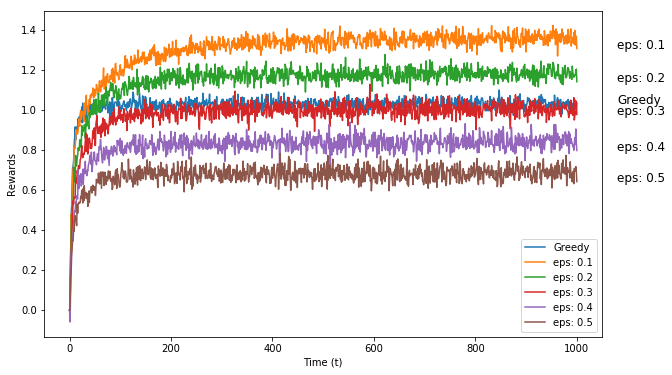

In [10]:
time = np.arange(T+1)

epsilons = [0, 0.1, 0.2, 0.3, 0.4 ,0.5]
data_greedy = simulate_greedy(epsilons)

plt.figure(figsize=(10, 6))
for i in range(len(data_greedy)):
    if i == 0:
        label = "Greedy"
    else:
        label = f"eps: {round(epsilons[i], 2)}"
    plt.plot(time, data_greedy[i], label=label)
    plt.text(time[-1] + 80, data_greedy[i][-1], label, fontsize=12)
plt.xlabel("Time (t)")
plt.ylabel("Rewards")
plt.legend()
plt.show()

We notice that at $\epsilon=0.3$ has approx. the same performance as greedy, $\epsilon=0.4$ performs worst, $\epsilon=0.2$ performs better

In [28]:
epsilons = [0, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3]
data_greedy_new = simulate_greedy(epsilons)

# set 400 as warm up time required to reach steady state
reward_means = [np.mean(rewards[400:]) for rewards in data_greedy_new]
for i in range(len(reward_means)):
    eps = epsilons[i]
    base_mean = reward_means[0]
    r_mean = reward_means[i]
    perform = "Better" if r_mean > base_mean else \
                "Worst" if r_mean < base_mean else ""
    print(f"eps: {eps} Average Rewards: {reward_means[i]} ({perform})")

eps: 0 Average Rewards: 1.0134459686714616 ()
eps: 0.27 Average Rewards: 1.0695985950382605 (Better)
eps: 0.275 Average Rewards: 1.0648032754828465 (Better)
eps: 0.28 Average Rewards: 1.062069782616915 (Better)
eps: 0.285 Average Rewards: 1.033637678572049 (Better)
eps: 0.29 Average Rewards: 1.0366515661034263 (Better)
eps: 0.295 Average Rewards: 1.020058512818882 (Better)
eps: 0.3 Average Rewards: 0.9980903970582163 (Worst)
